<a href="https://colab.research.google.com/github/Ahmed-Nezar/CNN_With_Fashion_MNIST/blob/main/CNN_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Writing Python code that compiles and trains a deep neural network on the Fashion MNIST dataset. Assume and tune your parameters and hyper-parameters.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import normalize

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

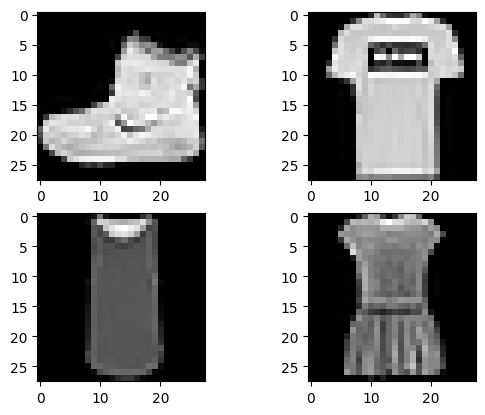

In [ ]:
# displaying dataset
for i in range(4):
  plt.subplot(2, 2, i+1)
  plt.imshow(x_train[i], cmap='gray')

In [ ]:
# Normalizing Dataset
x_train = normalize(x_train)
x_test = normalize(x_test)

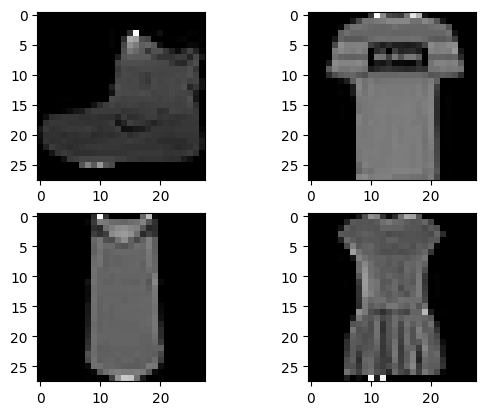

In [ ]:
# displaying dataset after normalization
for i in range(4):
  plt.subplot(2, 2, i+1)
  plt.imshow(x_train[i], cmap='gray')

In [ ]:
model = Sequential([
    Conv2D(64, (5,5), activation= "relu", input_shape = (28, 28, 1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (5,5), activation= "relu", input_shape = (28, 28, 1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(units = 128, activation = "relu"),
    Dense(units = 64, activation = "relu"),
    Dense(units = 10, activation = "softmax"),
])

model.compile(optimizer="adam", loss= tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ["accuracy"])

model.fit(x_train, y_train, epochs = 10, batch_size= 64)

Epoch 1/10
938/938 [==============================] - 122s 128ms/step - loss: 0.5157 - accuracy: 0.8099
Epoch 2/10
938/938 [==============================] - 120s 128ms/step - loss: 0.3223 - accuracy: 0.8817
Epoch 3/10
938/938 [==============================] - 119s 127ms/step - loss: 0.2784 - accuracy: 0.8976
Epoch 4/10
938/938 [==============================] - 120s 128ms/step - loss: 0.2501 - accuracy: 0.9087
Epoch 5/10
938/938 [==============================] - 118s 126ms/step - loss: 0.2257 - accuracy: 0.9170
Epoch 6/10
938/938 [==============================] - 118s 126ms/step - loss: 0.2052 - accuracy: 0.9233
Epoch 7/10
938/938 [==============================] - 118s 126ms/step - loss: 0.1874 - accuracy: 0.9304
Epoch 8/10
938/938 [==============================] - 118s 126ms/step - loss: 0.1722 - accuracy: 0.9352
Epoch 9/10
938/938 [==============================] - 118s 126ms/step - loss: 0.1577 - accuracy: 0.9411
Epoch 10/10
938/938 [==============================] - 118s 126m

In [ ]:
acc, lossess =model.evaluate(x_test, y_test)
print(f"Accuracy of the model {acc}")
print(f"Losses of the model {lossess}")

313/313 [==============================] - 4s 13ms/step - loss: 0.2594 - accuracy: 0.9130
Accuracy of the model 0.2593916654586792
Losses of the model 0.9129999876022339


In [ ]:
pred = model.predict(x_test) # Predicting

313/313 [==============================] - 4s 13ms/step


In [ ]:
d = {0:"T-shirt/top", 1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"} # assigning keys to each value

The Prediction will be Trouser
The Prediction will be Coat
The Prediction will be Shirt
The Prediction will be Sandal


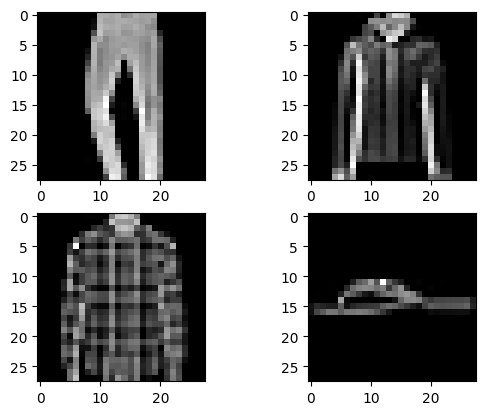

In [ ]:
# checking the predicted values
for i in range(5,9):
  plt.subplot(2, 2, i+1-5)
  plt.imshow(x_test[i], cmap='gray')
  print(f"The Prediction will be {d[np.argmax(pred[i])]}")